<a href="https://colab.research.google.com/github/HerbGlrt/BTC-Statistic-Analysis/blob/main/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Installs
!pip install openpyxl matplotlib seaborn
!pip install openpyxl

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a planilha
df = pd.read_excel('BTC_BD.xlsx')

# Exibir as primeiras linhas para verificar o carregamento correto
print(df.head())

        Date  Months_Since_Halving          Open          High           Low  \
0 2024-05-01                     1  60609.496094  60780.500000  56555.292969   
1 2024-04-01                     0  71333.484375  72715.359375  59120.066406   
2 2024-03-01                    47  61168.062500  73750.070313  59323.910156   
3 2024-02-01                    46  42569.761719  63913.132813  41879.191406   
4 2024-01-01                    45  42280.234375  48969.371094  38521.894531   

          Close Fechamento        Volume        VIX  Unnamed: 9  
0  59123.433594      Queda  8.115159e+10  14.520000         NaN  
1  60636.855469      Queda  1.016068e+12  16.137727  4º Halving  
2  71333.648438       Alta  1.446418e+12  13.787500         NaN  
3  61198.382813       Alta  8.307219e+11  13.980476         NaN  
4  42582.605469       Alta  8.259189e+11  13.388636     ETF BTC  


# Medidas de posição:


In [42]:
# Função para calcular as medidas de posição, ignorando médias e medianas para variáveis qualitativas
def calcular_medidas(df, colunas_qualitativas):
    medidas = []
    for coluna in df.columns:
        if coluna in colunas_qualitativas:
            moda = df[coluna].mode().iloc[0]
            medidas.append([coluna, moda, '-', '-', '-', '-'])
        else:
            moda = df[coluna].mode().iloc[0]
            media = df[coluna].mean().round(2)
            mediana = df[coluna].median().round(2)
            q1 = df[coluna].quantile(0.25).round(2)
            q3 = df[coluna].quantile(0.75).round(2)
            medidas.append([coluna, moda, media, mediana, q1, q3])
    return pd.DataFrame(medidas, columns=['Campo', 'Moda', 'Média', 'Mediana', 'Q1', 'Q3'])

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'Fechamento', 'Volume', 'VIX']
colunas_qualitativas = ['Fechamento']

# Calcular e exibir as medidas
medidas = calcular_medidas(df[colunas_interesse], colunas_qualitativas)

# Calcular a moda da coluna 'Fechamento'
moda_fechamento = df['Fechamento'].mode().iloc[0]

# Substituir todos os valores da coluna 'Fechamento' que não são a moda por "-"
df['Fechamento'] = df['Fechamento'].apply(lambda x: x if x == moda_fechamento else '-')

# Exibir a tabela de medidas
from IPython.display import display
display(medidas)

# Exibir as primeiras linhas do dataframe atualizado
print(df.head())


,Campo,Moda,Média,Mediana,Q1,Q3
0,Open,0.1,11361.94,2390.47,230.24,15938.99
1,High,0.2,13357.28,2958.02,265.71,20004.07
2,Low,0.0,9835.0,2027.99,202.1,15010.08
3,Close,4.9,11720.73,2678.09,231.66,17013.3
4,Fechamento,Alta,-,-,-,-
5,Volume,1050000.0,363552650471.5,39369998896.0,1795000.0,676793724413.75
6,VIX,10.2645,18.22,16.71,13.97,20.64


        Date  Months_Since_Halving          Open          High           Low  \
0 2024-05-01                     1  60609.496094  60780.500000  56555.292969   
1 2024-04-01                     0  71333.484375  72715.359375  59120.066406   
2 2024-03-01                    47  61168.062500  73750.070313  59323.910156   
3 2024-02-01                    46  42569.761719  63913.132813  41879.191406   
4 2024-01-01                    45  42280.234375  48969.371094  38521.894531   

          Close Fechamento        Volume        VIX  Unnamed: 9  
0  59123.433594          -  8.115159e+10  14.520000         NaN  
1  60636.855469          -  1.016068e+12  16.137727  4º Halving  
2  71333.648438       Alta  1.446418e+12  13.787500         NaN  
3  61198.382813       Alta  8.307219e+11  13.980476         NaN  
4  42582.605469       Alta  8.259189e+11  13.388636     ETF BTC  


                Q1  Q2 (Mediana)            Q3
Open        230.24  2.390470e+03  1.593899e+04
High        265.71  2.958020e+03  2.000407e+04
Low         202.10  2.027990e+03  1.501008e+04
Close       231.66  2.678090e+03  1.701330e+04
Volume  1795000.00  3.937000e+10  6.767937e+11
VIX          13.97  1.671000e+01  2.064000e+01


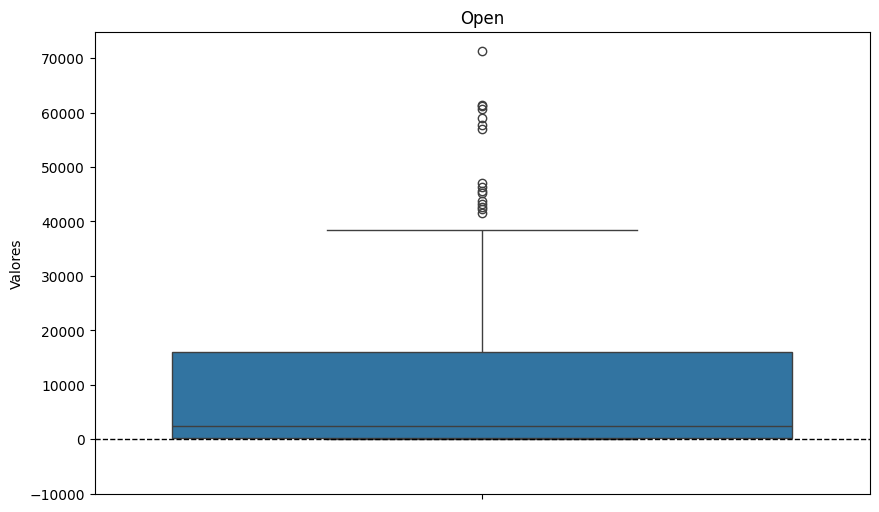

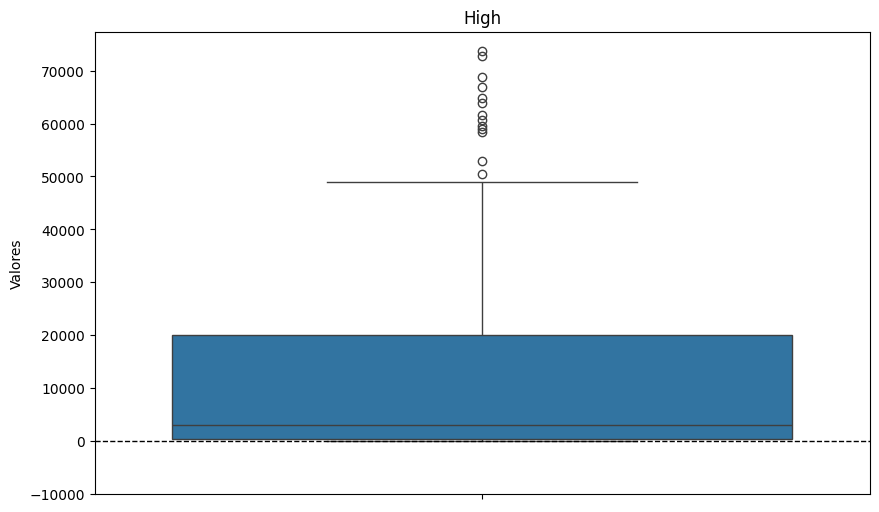

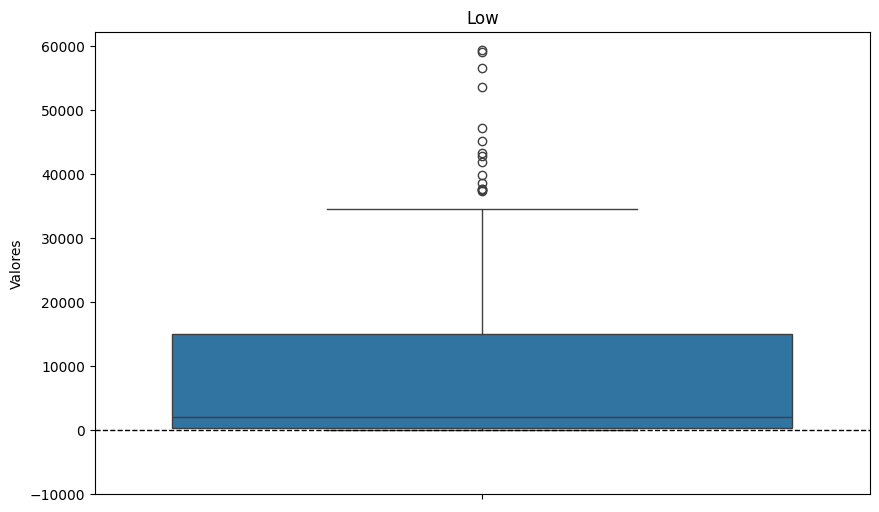

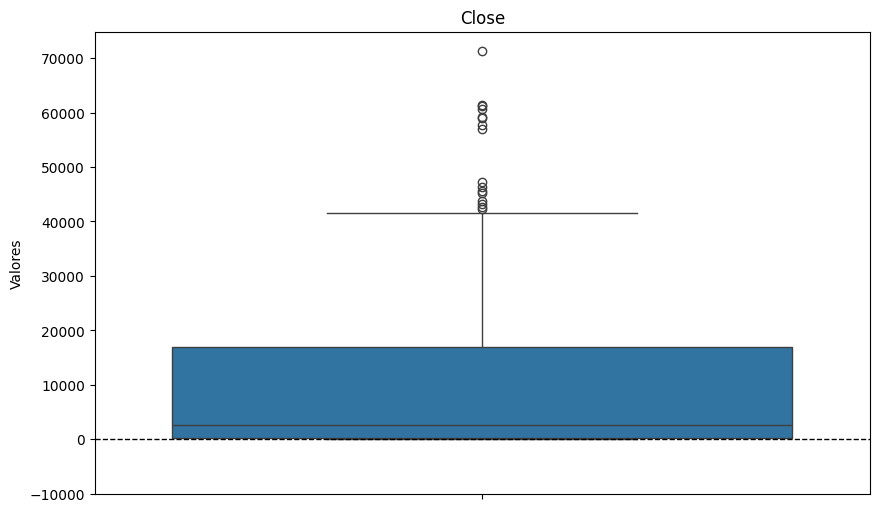

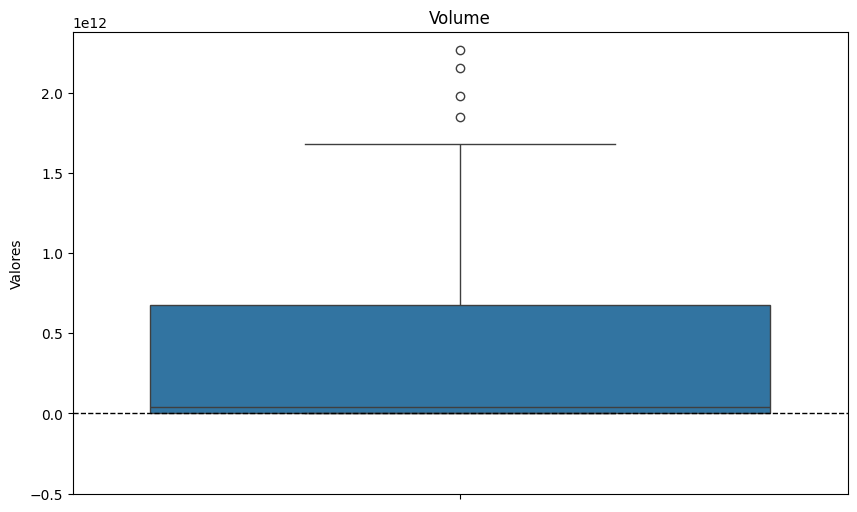

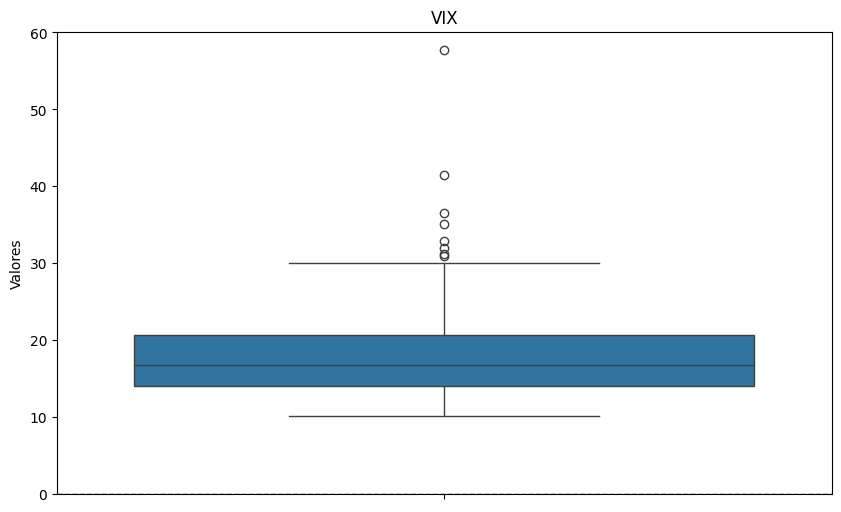

In [43]:
# Passo 4: Calcular os quartis
def calcular_quartis(df):
    quartis = pd.DataFrame()
    quartis['Q1'] = df.quantile(0.25).round(2)
    quartis['Q2 (Mediana)'] = df.quantile(0.50).round(2)
    quartis['Q3'] = df.quantile(0.75).round(2)
    return quartis

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'Volume', 'VIX']

# Calcular e exibir os quartis
quartis = calcular_quartis(df[colunas_interesse])
print(quartis)

# Passo 5: Gerar boxplots separados com ajustes solicitados
def ajustar_limites_eixos(coluna):
    if coluna in ['Open', 'High', 'Low', 'Close']:
        return (-10000, None)
    elif coluna == 'Volume':
        return (-0.5e12, None)
    elif coluna == 'VIX':
        return (0, None)
    return (None, None)

for coluna in colunas_interesse:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
    plt.ylabel('Valores')
    # Ajustar os limites do eixo y
    plt.ylim(ajustar_limites_eixos(coluna))
    # Adicionar uma linha pontilhada no nível 0 do eixo y
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    # Salvar cada figura como uma imagem separada
    plt.savefig(f'{coluna}_boxplot.png')
    plt.show()

#Medidas de dispersão:

In [44]:
# Calcular as medidas de dispersão
def calcular_medidas_dispersao(df):
    dispersao = pd.DataFrame()
    dispersao['Amplitude'] = df.max() - df.min()
    dispersao['Intervalo Interquartil (IQR)'] = df.quantile(0.75) - df.quantile(0.25)
    dispersao['Variância'] = df.var().round(2)
    dispersao['Desvio Padrão'] = df.std().round(2)
    dispersao['Coeficiente de Variação (%)'] = (df.std() / df.mean() * 100).round(2)
    return dispersao

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'Volume', 'VIX']

# Calcular e exibir as medidas de dispersão
medidas_dispersao = calcular_medidas_dispersao(df[colunas_interesse])
print(medidas_dispersao)

# Exibir a tabela de medidas de dispersão
from IPython.display import display
display(medidas_dispersao)


           Amplitude  Intervalo Interquartil (IQR)     Variância  \
Open    7.133338e+04                  1.570875e+04  2.796024e+08   
High    7.374997e+04                  1.973836e+04  3.736445e+08   
Low     5.932391e+04                  1.480797e+04  2.101791e+08   
Close   7.133355e+04                  1.678164e+04  2.927083e+08   
Volume  2.267153e+12                  6.767919e+11  2.523971e+23   
VIX     4.761136e+01                  6.666851e+00  4.161000e+01   

        Desvio Padrão  Coeficiente de Variação (%)  
Open     1.672132e+04                       147.17  
High     1.932989e+04                       144.71  
Low      1.449756e+04                       147.41  
Close    1.710872e+04                       145.97  
Volume   5.023914e+11                       138.19  
VIX      6.450000e+00                        35.40  


,Amplitude,Intervalo Interquartil (IQR),Variância,Desvio Padrão,Coeficiente de Variação (%)
Open,7.133338e+04,1.570875e+04,2.796024e+08,1.672132e+04,147.17
High,7.374997e+04,1.973836e+04,3.736445e+08,1.932989e+04,144.71
Low,5.932391e+04,1.480797e+04,2.101791e+08,1.449756e+04,147.41
Close,7.133355e+04,1.678164e+04,2.927083e+08,1.710872e+04,145.97
Volume,2.267153e+12,6.767919e+11,2.523971e+23,5.023914e+11,138.19
VIX,4.761136e+01,6.666851e+00,4.161000e+01,6.450000e+00,35.40


In [45]:
# Calcular a frequência das categorias da variável qualitativa 'Fechamento'
freq_qualitative = df['Fechamento'].value_counts()

# Calcular a frequência das categorias da variável qualitativa 'Fechamento'
freq_qualitative = df['Fechamento'].value_counts().reset_index()
freq_qualitative.columns = ['Categoria', 'Frequência']

# Calcular a frequência dos valores da variável quantitativa 'Close'
freq_quantitative = pd.cut(df['Close'], bins=10).value_counts().reset_index()
freq_quantitative.columns = ['Intervalo de Fechamento', 'Frequência']

# Exibir os resultados
print("Frequência da variável qualitativa (Fechamento):")
print(freq_qualitative)

print("\nFrequência da variável quantitativa (Close):")
print(freq_quantitative)


Frequência da variável qualitativa (Fechamento):
  Categoria  Frequência
0      Alta          99
1         -          67

Frequência da variável quantitativa (Close):
  Intervalo de Fechamento  Frequência
0     (-71.234, 7133.455]          99
1    (7133.455, 14266.81]          24
2  (28533.519, 35666.874]           8
3   (14266.81, 21400.165]           7
4  (21400.165, 28533.519]           7
5  (35666.874, 42800.229]           7
6  (42800.229, 49933.584]           6
7  (57066.939, 64200.294]           6
8  (49933.584, 57066.939]           1
9  (64200.294, 71333.648]           1


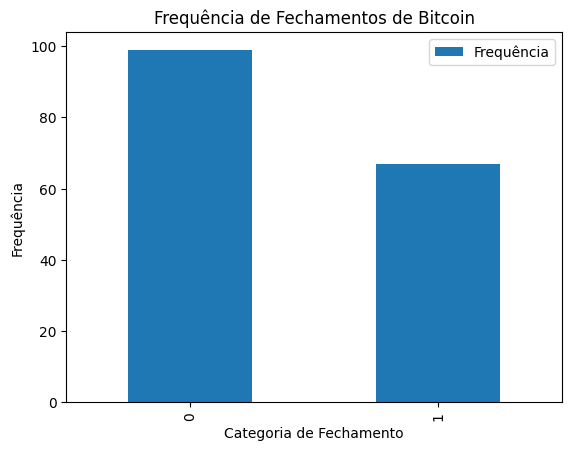

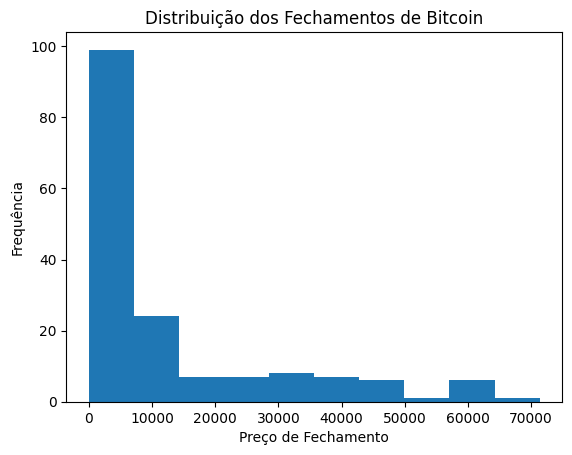

In [ ]:

# Gráfico de barras para a variável qualitativa
freq_qualitative.plot(kind='bar')
plt.title('Frequência de Fechamentos de Bitcoin')
plt.xlabel('Categoria de Fechamento')
plt.ylabel('Frequência')
plt.show()

# Histograma para a variável quantitativa
df['Close'].plot(kind='hist', bins=10)
plt.title('Distribuição dos Fechamentos de Bitcoin')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')
plt.show()


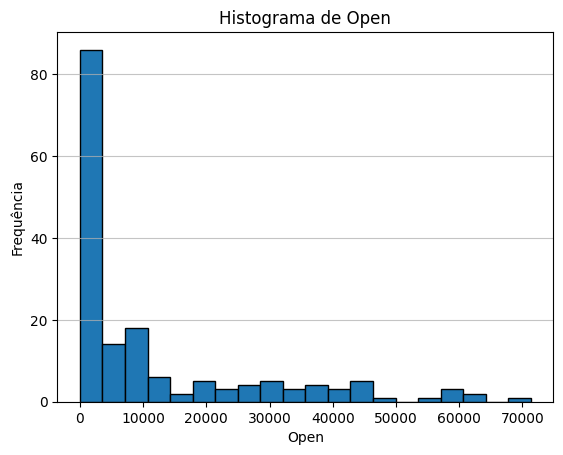

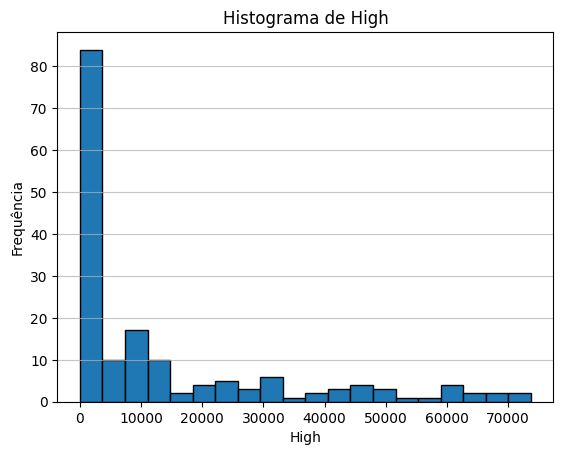

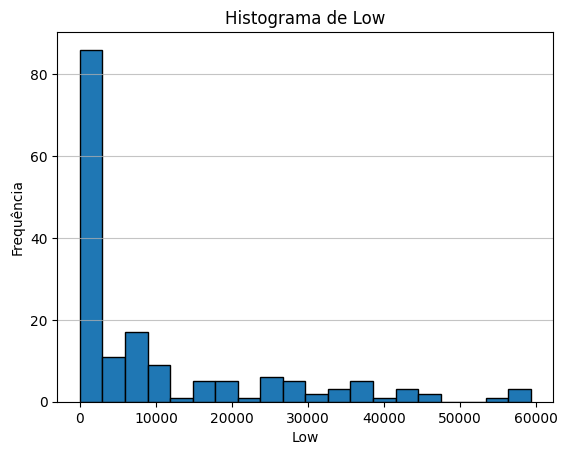

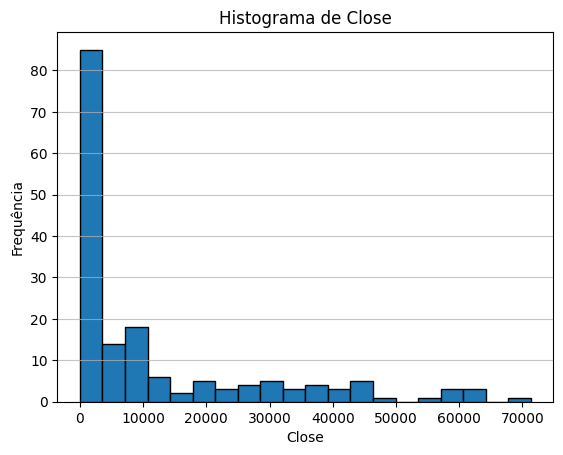

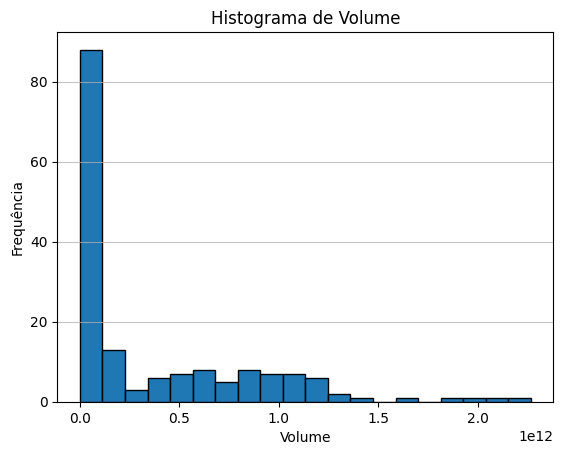

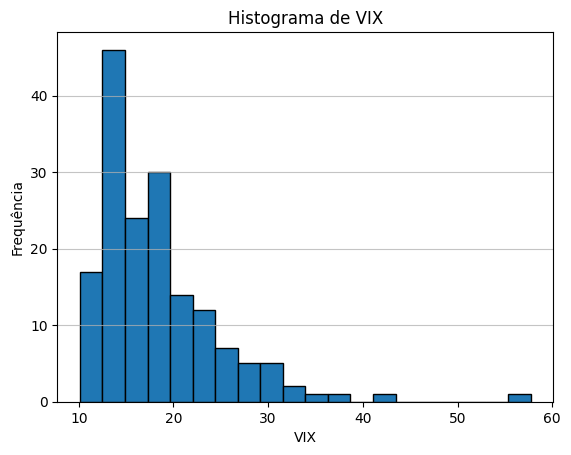

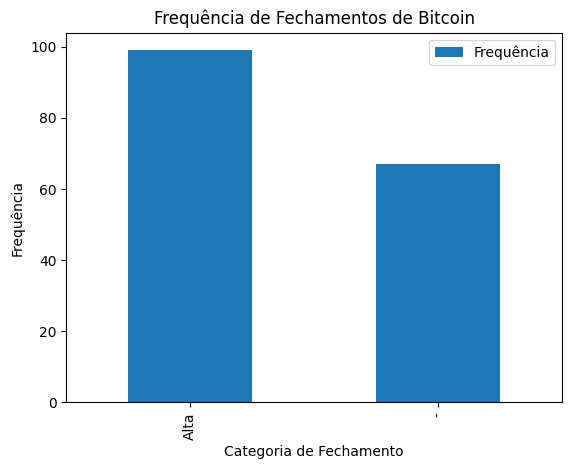

In [ ]:
# Criar histogramas para cada coluna quantitativa
for column in colunas_interesse:
    plt.figure()
    df[column].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Gráfico de barras para a variável qualitativa
freq_qualitative.set_index('Categoria').plot(kind='bar')
plt.title('Frequência de Fechamentos de Bitcoin')
plt.xlabel('Categoria de Fechamento')
plt.ylabel('Frequência')
plt.show()